## Import dataset from Kaggle

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chilaact","key":"a6f73e21fcab2f56c68e9754c5413f8c"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:44<00:00, 60.1MB/s]
100% 2.70G/2.70G [00:45<00:00, 64.4MB/s]


In [5]:
import os
import zipfile

local_zip = '/content/new-plant-diseases-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Import Libraries

In [7]:
from numpy import expand_dims
import matplotlib.pyplot as plt

from tensorflow.keras import Input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

## Transfer Learning

In [8]:
# download model
pretrained_model = MobileNet(include_top=False)

# number of labels/classes
CLASSES = 38

# add / replace a new layer in the output layer
x = pretrained_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)

# make the last layer use the activation function
# softmax so that it can be multi-class classification
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=(pretrained_model.input), outputs=predictions)

model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
______________________________________________________________

## Compile model

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

## Pre-processing

In [10]:
batch_size =32
base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

# preprocess parameters
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

# preprocess all images in each folder
train_generator = train_datagen.flow_from_directory(base_dir+'/train',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(base_dir+'/valid',
                                                         target_size=(224, 224),
                                                         batch_size=batch_size,
                                                         class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


Get the class name from the folder name

In [11]:
li = list(train_generator.class_indices.keys())

for i in li:
    print(i)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy


## Training model

In [12]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              steps_per_epoch=train_generator.samples//batch_size,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples//batch_size)
# save model
model.save('mobilenet.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
2196/2196 [==============================] - 1045s 476ms/step - loss: 0.3728 - accuracy: 0.8906 - val_loss: 1.1278 - val_accuracy: 0.7670
Epoch 2/10
2196/2196 [==============================] - 1030s 469ms/step - loss: 0.1705 - accuracy: 0.9506 - val_loss: 1.8743 - val_accuracy: 0.6685
Epoch 3/10
2196/2196 [==============================] - 1020s 465ms/step - loss: 0.1276 - accuracy: 0.9635 - val_loss: 0.9299 - val_accuracy: 0.8184
Epoch 4/10
2196/2196 [==============================] - 1018s 464ms/step - loss: 0.1114 - accuracy: 0.9693 - val_loss: 1.7416 - val_accuracy: 0.7659
Epoch 5/10
2196/2196 [==============================] - 1020s 465ms/step - loss: 0.0984 - accuracy: 0.9731 - val_loss: 3.3893 - val_accuracy: 0.6263
Epoch 6/10
2196/2196 [==============================] - 1030s 469ms/step - loss: 0.0884 - accuracy: 0.9762 - val_loss: 4.7515 - val_accuracy: 0.5931
Epoch 7/10
2196/2196 [========

## Graphic loss and accuracy during training

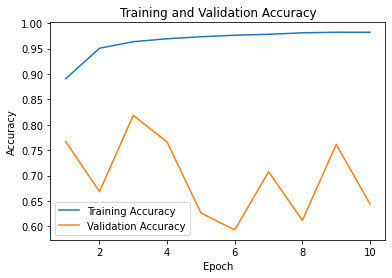

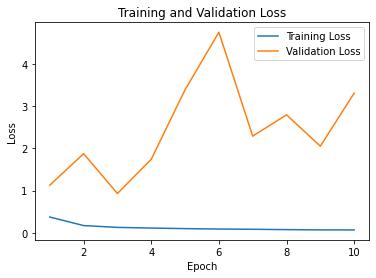

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# accuracy
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

# loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Load and testing model

In [14]:
load_model = load_model('mobilenet.h5')

Used to test performance

Result Prediction:


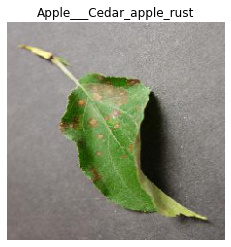

In [17]:
image_path = "/content/test/test/AppleCedarRust3.JPG"

# change image size
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = expand_dims(img, axis=0)
img = img/255

print("Result Prediction:")
prediction = load_model.predict(img)

# take name class
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

# show image       
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

The above coding is the result of the development of :<br>
https://www.kaggle.com/vipoooool/plant-diseases-classification-using-alexnet<br>
https://www.kaggle.com/vimaladit/fork-of-plant-diseases-classification-using-incep3